In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('churn.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

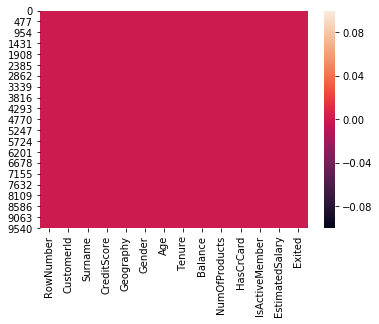

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.duplicated().sum()

0

In [10]:
x=df.iloc[:,3:13].values
y=df.iloc[:,13].values

In [11]:
le=LabelEncoder()
ohe=OneHotEncoder(categorical_features=[1])

x[:,1]=le.fit_transform(x[:,1])
x[:,2]=le.fit_transform(x[:,2])
x=ohe.fit_transform(x).toarray()
x=x[:,1:]

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [15]:
# Initialising the ANN
classifier=Sequential()

In [16]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim=6, init='uniform',activation='relu',input_dim=11))

In [17]:
#Adding the second hidden layer
classifier.add(Dense(output_dim=6,init='uniform',activation='relu'))

In [18]:
#Adding the output layer
classifier.add(Dense(output_dim=1, init='uniform',activation='sigmoid'))

In [19]:
# Compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
#Fitting the ANN to the Training set
classifier.fit(x_train,y_train,batch_size=10,nb_epoch=100)

Epoch 1/100
8000/8000 [==============================] - 3s 431us/step - loss: 0.4841 - accuracy: 0.7958
Epoch 2/100
8000/8000 [==============================] - 2s 274us/step - loss: 0.4289 - accuracy: 0.7960
Epoch 3/100
8000/8000 [==============================] - 2s 264us/step - loss: 0.4242 - accuracy: 0.7960
Epoch 4/100
8000/8000 [==============================] - 3s 321us/step - loss: 0.4200 - accuracy: 0.8129
Epoch 5/100
8000/8000 [==============================] - 2s 270us/step - loss: 0.4171 - accuracy: 0.8235
Epoch 6/100
8000/8000 [==============================] - 2s 294us/step - loss: 0.4152 - accuracy: 0.8299
Epoch 7/100
8000/8000 [==============================] - 2s 276us/step - loss: 0.4132 - accuracy: 0.8309
Epoch 8/100
8000/8000 [==============================] - 2s 272us/step - loss: 0.4121 - accuracy: 0.8313
Epoch 9/100
8000/8000 [==============================] - 2s 310us/step - loss: 0.4109 - accuracy: 0.8321
Epoch 10/100
8000/8000 [==============================]

Epoch 78/100
8000/8000 [==============================] - 2s 232us/step - loss: 0.4003 - accuracy: 0.8354
Epoch 79/100
8000/8000 [==============================] - 2s 238us/step - loss: 0.4004 - accuracy: 0.8349
Epoch 80/100
8000/8000 [==============================] - 2s 221us/step - loss: 0.4004 - accuracy: 0.8346
Epoch 81/100
8000/8000 [==============================] - 2s 231us/step - loss: 0.3998 - accuracy: 0.8346
Epoch 82/100
8000/8000 [==============================] - 2s 241us/step - loss: 0.4004 - accuracy: 0.8340
Epoch 83/100
8000/8000 [==============================] - 2s 224us/step - loss: 0.4003 - accuracy: 0.8351
Epoch 84/100
8000/8000 [==============================] - 2s 245us/step - loss: 0.4001 - accuracy: 0.8365
Epoch 85/100
8000/8000 [==============================] - 2s 233us/step - loss: 0.4002 - accuracy: 0.8341
Epoch 86/100
8000/8000 [==============================] - 2s 213us/step - loss: 0.4004 - accuracy: 0.8349
Epoch 87/100
8000/8000 [======================

In [21]:
#The Acc in the First Epoch is 79%
#The Acc in the last Epoch is 83%

In [22]:
# Predicting the Test set results

pred=classifier.predict(x_test)
pred=(pred>0.5)

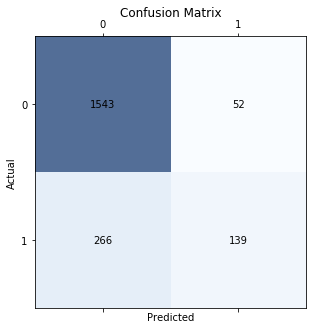

In [23]:
# Making the confusion Matrix

cm=confusion_matrix(y_test,pred)
fig,ax=plt.subplots(figsize=(5,5))
ax.matshow(cm,cmap=plt.cm.Blues,alpha=0.7)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j,y=i,s=cm[i,j],va='center',ha='center')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()